In [175]:
from keras.utils import Sequence
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


T = 10
batch_size = 5
data_size = 100
length = 10

# assert (data_size//length) % batch_size == 0

data = np.array([[i, np.sin(2*np.pi*i/T), np.cos(2*np.pi*i/T)] for i in range(data_size)])
targets = np.array([[i] for i in range(data_size)])

data_gen = TimeseriesGenerator(data, targets,
                               length=length, stride=length, shuffle=False, batch_size=batch_size)

batch_0 = data_gen[0]
x, y = batch_0
# assert np.array_equal(x,
#                       np.array([[[0], [2], [4], [6], [8]],
#                                 [[1], [3], [5], [7], [9]]]))
# assert np.array_equal(y,
#                       np.array([[10], [11]]))

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [176]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [177]:
logging.debug("x")

DEBUG:root:x


In [178]:
import random

In [212]:
class ShufflingTimeSeriesGenerator(Sequence):

    def __init__(self, data, targets, length,
                 sampling_rate=1,
                 stride=1,
                 start_index=0,
                 end_index=None,
                 shuffle=False,
                 reverse=False,
                 shuffle_sequence=False,
                 batch_size=128):

        self.data = data
        self.targets = targets
        self.length = length
        self.sampling_rate = sampling_rate
        self.stride = stride
        self.start_index = start_index
        if end_index is None:
            end_index = len(data) - 1
        self.end_index = end_index
        self.shuffle = shuffle
        self.reverse = reverse
        self.batch_size = batch_size
        self.shuffle_sequence = shuffle_sequence

    def __len__(self):
        return int(np.ceil(
            (self.end_index - self.start_index) /
            (self.batch_size * self.stride)))
    
    def _empty_batch(self, num_rows):
        samples_shape = [num_rows, self.length // self.sampling_rate]
        samples_shape.extend(self.data.shape[1:])
        targets_shape = [num_rows, self.length // self.sampling_rate]
        targets_shape.extend(self.targets.shape[1:])
        return np.empty(samples_shape), np.empty(targets_shape)
    
    def __getitem__(self, index):
        i = self.start_index + self.batch_size * self.stride * index
        logging.debug(f"i: {i}")
        logging.debug(f"{i, (i + self.batch_size * self.stride, self.end_index), self.stride}")
        rows = np.arange(i, min(i + self.batch_size *
                                self.stride, self.end_index), self.stride)
        logging.debug(f"rows: {rows}")

        samples, targets = self._empty_batch(len(rows))
        for j, row in enumerate(rows):
            indices = range(rows[j], rows[j] + self.length, self.sampling_rate)
            if self.shuffle:
                indices = list(indices)
                random.shuffle(indices)
            logging.debug(f"indices: {indices}")
            samples[j] = self.data[indices]
            targets[j] = self.targets[indices]
        if self.reverse:
            return samples[:, ::-1, ...], targets
        return samples, targets

T = 10
batch_size = 5
data_size = 101
length = 10
data = np.array([[i] for i in range(data_size)])
targets = np.array([[i] for i in range(data_size)])

data_gen = ShufflingTimeSeriesGenerator(data, targets,
                               length=length, stride=length, shuffle=False, batch_size=batch_size)
x, y = data_gen[0]
y
x, y = data_gen[1]
y

DEBUG:root:i: 0
DEBUG:root:(0, (50, 100), 10)
DEBUG:root:rows: [ 0 10 20 30 40]
DEBUG:root:indices: range(0, 10)
DEBUG:root:indices: range(10, 20)
DEBUG:root:indices: range(20, 30)
DEBUG:root:indices: range(30, 40)
DEBUG:root:indices: range(40, 50)
DEBUG:root:i: 50
DEBUG:root:(50, (100, 100), 10)
DEBUG:root:rows: [50 60 70 80 90]
DEBUG:root:indices: range(50, 60)
DEBUG:root:indices: range(60, 70)
DEBUG:root:indices: range(70, 80)
DEBUG:root:indices: range(80, 90)
DEBUG:root:indices: range(90, 100)


array([[[50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.]],

       [[60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [66.],
        [67.],
        [68.],
        [69.]],

       [[70.],
        [71.],
        [72.],
        [73.],
        [74.],
        [75.],
        [76.],
        [77.],
        [78.],
        [79.]],

       [[80.],
        [81.],
        [82.],
        [83.],
        [84.],
        [85.],
        [86.],
        [87.],
        [88.],
        [89.]],

       [[90.],
        [91.],
        [92.],
        [93.],
        [94.],
        [95.],
        [96.],
        [97.],
        [98.],
        [99.]]])

In [199]:
data[:length]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [201]:
np.array_equal(x[0], data[:length])

True

In [210]:
data[length*batch_size:length*batch_size+length]

array([[50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59]])

In [207]:
x, y = data_gen[1]
x[0]

DEBUG:root:i: 50
DEBUG:root:(50, (100, 100), 10)
DEBUG:root:rows: [50 60 70 80 90]
DEBUG:root:indices: range(50, 60)
DEBUG:root:indices: range(60, 70)
DEBUG:root:indices: range(70, 80)
DEBUG:root:indices: range(80, 90)
DEBUG:root:indices: range(90, 100)


array([[50.],
       [51.],
       [52.],
       [53.],
       [54.],
       [55.],
       [56.],
       [57.],
       [58.],
       [59.]])

In [206]:
x, y = data_gen[1]
y

DEBUG:root:i: 50
DEBUG:root:(50, (100, 100), 10)
DEBUG:root:rows: [50 60 70 80 90]
DEBUG:root:indices: range(50, 60)
DEBUG:root:indices: range(60, 70)
DEBUG:root:indices: range(70, 80)
DEBUG:root:indices: range(80, 90)
DEBUG:root:indices: range(90, 100)


array([[[50.],
        [51.],
        [52.],
        [53.],
        [54.],
        [55.],
        [56.],
        [57.],
        [58.],
        [59.]],

       [[60.],
        [61.],
        [62.],
        [63.],
        [64.],
        [65.],
        [66.],
        [67.],
        [68.],
        [69.]],

       [[70.],
        [71.],
        [72.],
        [73.],
        [74.],
        [75.],
        [76.],
        [77.],
        [78.],
        [79.]],

       [[80.],
        [81.],
        [82.],
        [83.],
        [84.],
        [85.],
        [86.],
        [87.],
        [88.],
        [89.]],

       [[90.],
        [91.],
        [92.],
        [93.],
        [94.],
        [95.],
        [96.],
        [97.],
        [98.],
        [99.]]])

In [99]:
x, y = data_gen[2]
x

array([], shape=(0, 10, 1), dtype=float64)

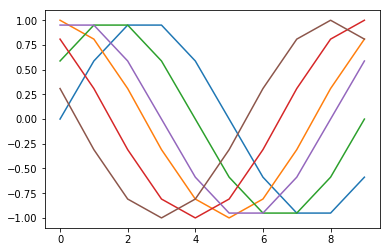

In [15]:
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])

In [85]:
x.shape

(2, 10, 3)

In [86]:
np.random.shuffle(x[0])

In [91]:
np.array_equal(data[:10].astype(float), x[0])

True

In [102]:
len(data_gen)

4

In [103]:
for x, y in data_gen:
    print(x.shape)
    print(x)
    

(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 11

  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 29

  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 

(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[3

  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]

[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 30

  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 

  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 39

  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 29

  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]]]
(1, 10, 3)
[[[200. 201. 202.]
  [210. 211. 212.]
  [220. 221. 222.]
  [230. 231. 232.]
  [240. 241. 242.]
  [250. 251. 252.]
  [260. 261. 262.]
  [270. 271. 272.]
  [280. 281. 282.]
  [290. 291. 292.]]]
(1, 10, 3)
[[[300. 301. 302.]
  [310. 311. 312.]
  [320. 321. 322.]
  [330. 331. 332.]
  [340. 341. 342.]
  [350. 351. 352.]
  [360. 361. 362.]
  [370. 371. 372.]
  [380. 381. 382.]
  [390. 391. 392.]]]
(1, 10, 3)
[[[ 0.  1.  2.]
  [10. 11. 12.]
  [20. 21. 22.]
  [30. 31. 32.]
  [40. 41. 42.]
  [50. 51. 52.]
  [60. 61. 62.]
  [70. 71. 72.]
  [80. 81. 82.]
  [90. 91. 92.]]]
(1, 10, 3)
[[[100. 101. 102.]
  [110. 111. 112.]
  [120. 121. 122.]
  [130. 131. 132.]
  [140. 141. 142.]
  [150. 151. 152.]
  [160. 161. 162.]
  [170. 171. 172.]
  [180. 181. 182.]
  [190. 191. 192.]

KeyboardInterrupt: 

In [99]:
len(data_gen)

2